In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Check if folder input exists

# Define the folder name
folder_name = '../input'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../input' folder already exists.


In [3]:
# Check if folder tickers exists

# Define the folder name
folder_name = '../tickers'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../tickers' folder already exists.


In [4]:
# Webscrapping Wikipedia table to get the SP500 components
page = requests.get("https://en.wikipedia.org/wiki/Swiss_Market_Index")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table', class_="wikitable sortable")

In [5]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Rank,Name,Industry,Ticker,Canton,Weighting in %
0,1,Nestlé SA,Food,NESN.SW,Vaud,19[1]
1,2,Roche Holding AG,Pharmacy,ROG.SW,Basel,17[1]
2,3,Novartis International AG,Pharmacy,NOVN.SW,Basel,17[1]
3,4,Compagnie Financière Richemont SA,Luxury Goods,CFR.SW,Geneva,7[1]
4,5,Zurich Insurance Group AG,Insurance,ZURN.SW,Zurich,6[1]
5,6,UBS Group AG,Banks,UBSG.SW,Zurich/Basel,5[1]
6,7,ABB Ltd,Electrical equipment,ABBN.SW,Zurich,4[1]
7,8,Lonza Group AG,Chemistry,LONN.SW,Basel,4[1]
8,9,Sika AG,Chemistry,SIKA.SW,Zug,3[1]
9,10,Alcon Inc,Pharmacy,ALC.SW,Fribourg,3[1]


In [6]:
wiki.rename(columns={'Industry':'Sector'}, inplace=True)

In [7]:
# Add index row values
new_row = {'Name': 'SMI', 'Sector': 'Index', 'Ticker': '^SSMI'}

# Convert the new row to a DataFrame
new_row_df = pd.DataFrame([new_row])

# Append the new row to the DataFrame
wiki = pd.concat([wiki[['Name','Sector','Ticker']], new_row_df], ignore_index=True)
wiki.head(21)

,Name,Sector,Ticker
0,Nestlé SA,Food,NESN.SW
1,Roche Holding AG,Pharmacy,ROG.SW
2,Novartis International AG,Pharmacy,NOVN.SW
3,Compagnie Financière Richemont SA,Luxury Goods,CFR.SW
4,Zurich Insurance Group AG,Insurance,ZURN.SW
5,UBS Group AG,Banks,UBSG.SW
6,ABB Ltd,Electrical equipment,ABBN.SW
7,Lonza Group AG,Chemistry,LONN.SW
8,Sika AG,Chemistry,SIKA.SW
9,Alcon Inc,Pharmacy,ALC.SW


In [8]:
# Get the data for the stock
index_list = wiki['Ticker'].tolist()

In [9]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False,multi_level_index=False,actions=True,auto_adjust=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/21 [00:00<?, ?it/s]

In [10]:
# Get the name of the notebook
notebook_name = os.path.basename(globals()['__vsc_ipynb_file__'])
notebook_name = notebook_name.split('-')[0]

In [11]:
# Save all the tickers data
wiki[['Name','Sector','Ticker']].to_csv(f"../tickers/{notebook_name}.csv",index=True)

In [12]:
# Configuration of different parameters of the notebook
ticker = 'ALC.SW'
year = '2025'

In [13]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2019-04-08,48.957424,50.000000,0.0,50.000000,50.000000,50.000000,0.0,0
2019-04-09,56.839569,58.049999,0.0,58.770000,54.840000,55.000000,0.0,27102313
2019-04-10,56.438114,57.639999,0.0,58.540001,56.119999,58.500000,0.0,9612093
2019-04-11,54.832310,56.000000,0.0,57.240002,55.549999,57.000000,0.0,7584156
2019-04-12,52.874016,54.000000,0.0,55.139999,53.820000,54.000000,0.0,9887415
2019-04-15,53.931499,55.080002,0.0,55.970001,54.099998,54.099998,0.0,5311456
2019-04-16,55.126053,56.299999,0.0,56.480000,55.610001,55.630001,0.0,4092226
2019-04-17,56.643738,57.849998,0.0,57.849998,57.000000,57.000000,0.0,5155431
2019-04-18,54.744190,55.910000,0.0,57.380001,55.400002,57.279999,0.0,4139662


In [14]:
# Check DataFrame tail
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2025-05-12,79.779999,80.059998,0.00,80.959999,79.000000,79.940002,0.0,1044553
2025-05-13,79.199997,79.199997,0.28,80.239998,78.980003,79.339996,0.0,961204
2025-05-14,73.160004,73.160004,0.00,74.440002,71.699997,73.300003,0.0,3397266
2025-05-15,73.120003,73.120003,0.00,73.820000,72.120003,73.040001,0.0,1652110
2025-05-16,74.879997,74.879997,0.00,75.080002,72.919998,72.919998,0.0,1612853
2025-05-19,74.080002,74.080002,0.00,74.919998,73.639999,74.540001,0.0,960990
2025-05-20,74.080002,74.080002,0.00,74.620003,73.480003,73.879997,0.0,666475
2025-05-21,73.139999,73.139999,0.00,73.980003,73.019997,73.500000,0.0,1325006
2025-05-22,71.620003,71.620003,0.00,73.059998,71.559998,72.879997,0.0,962378


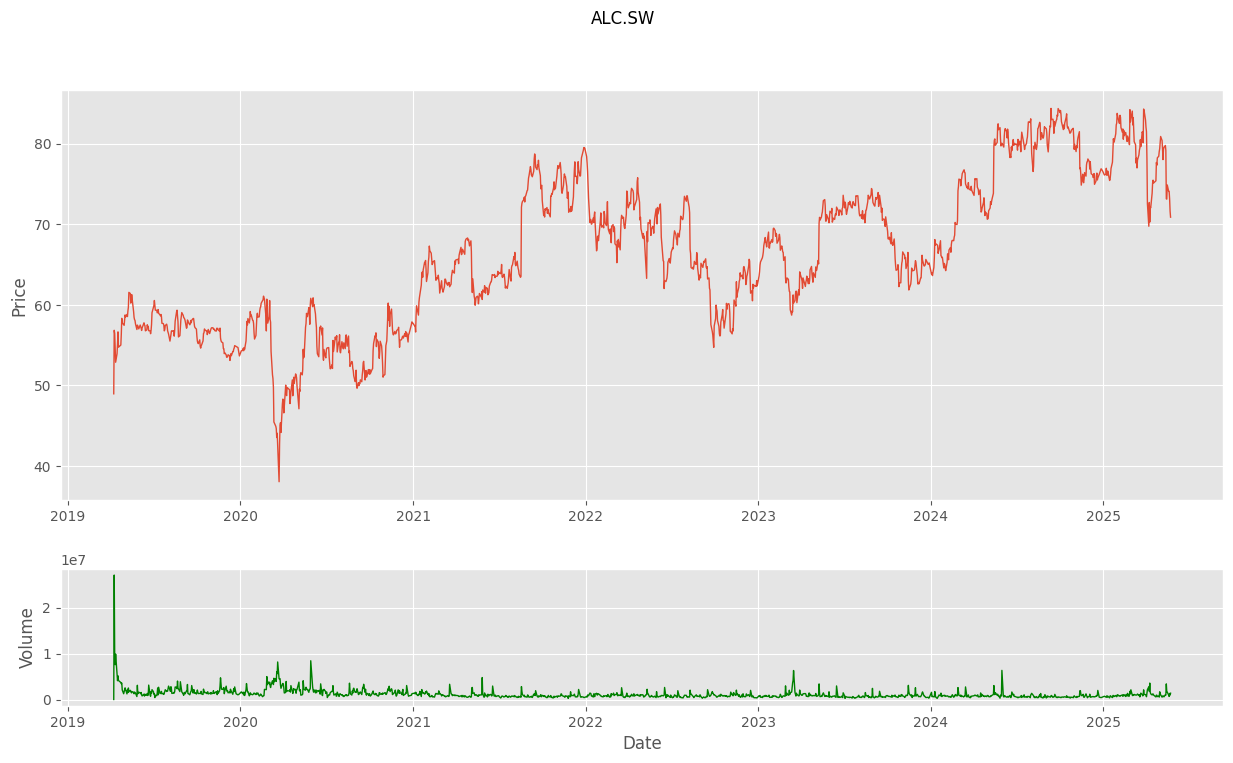

In [15]:
# Plot the adjusted close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [16]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [17]:
# Group per year and calculate cummulative return
stock_ticker['Year'] = stock_ticker.index.year
annual_data = stock_ticker.groupby('Year').agg(Adj_Close=('Adj Close','last'))
annual_data['Return'] = annual_data["Adj_Close"].pct_change()*100
annual_data

,Adj_Close,Return
Year,,
2019,53.657337,NaN
2020,57.822758,7.763003
2021,79.459068,37.418330
2022,62.357410,-21.522601
2023,65.199257,4.557352
2024,76.631058,17.533637
2025,70.879997,-7.504869


In [18]:
# Plotly
fig = make_subplots()

# Add colors
colors = ['green' if x >= 0 else 'red' for x in annual_data['Return']]

# Graph (1,1)
fig.add_trace(go.Bar(y=annual_data['Return'],x=annual_data['Return'].index,text=round(annual_data['Return'],2),textposition='outside',marker_color=colors,hoverinfo='skip'),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Returns", row=1, col=1)

fig.update_layout(xaxis=dict(tickvals=annual_data.index,tickangle=-45),height=800, width=1300,title=f"Returns per year {ticker}")

fig.show()

In [19]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

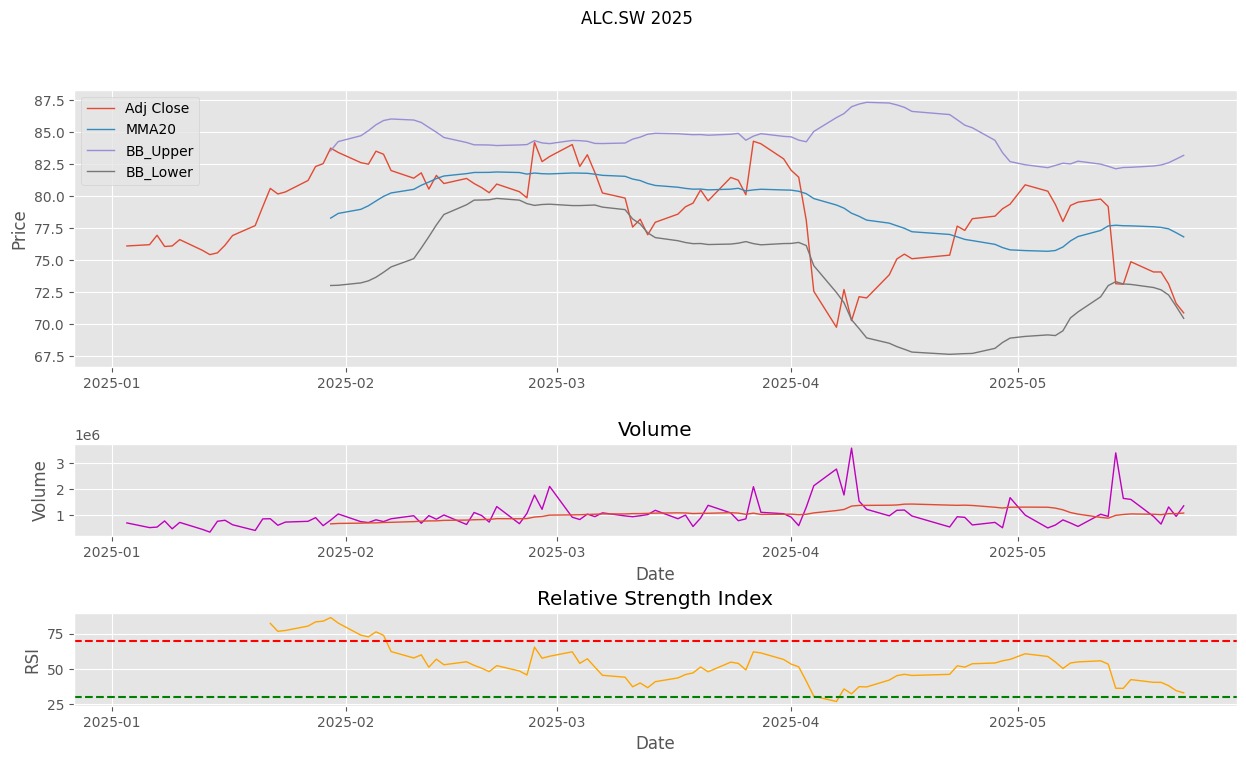

In [20]:
# Plot the adjusted close price
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [21]:
# Plot the adjusted close price
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [22]:
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Year,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,,,,
2025-05-12,79.779999,80.059998,0.00,80.959999,79.000000,79.940002,0.0,1044553,2025,77.325616,82.513853,72.137378,55.768522,0.300674
2025-05-13,79.199997,79.199997,0.28,80.239998,78.980003,79.339996,0.0,961204,2025,77.678276,82.342925,73.013627,53.425410,-0.727002
2025-05-14,73.160004,73.160004,0.00,74.440002,71.699997,73.300003,0.0,3397266,2025,77.733919,82.148394,73.319445,36.314431,-7.626254
2025-05-15,73.120003,73.120003,0.00,73.820000,72.120003,73.040001,0.0,1652110,2025,77.696880,82.250944,73.142816,36.231669,-0.054676
2025-05-16,74.879997,74.879997,0.00,75.080002,72.919998,72.919998,0.0,1612853,2025,77.686058,82.265746,73.106370,42.446793,2.406995
2025-05-19,74.080002,74.080002,0.00,74.919998,73.639999,74.540001,0.0,960990,2025,77.616303,82.367844,72.864762,40.513892,-1.068370
2025-05-20,74.080002,74.080002,0.00,74.620003,73.480003,73.879997,0.0,666475,2025,77.564485,82.444808,72.684162,40.513892,0.000000
2025-05-21,73.139999,73.139999,0.00,73.980003,73.019997,73.500000,0.0,1325006,2025,77.451715,82.622876,72.280554,38.146705,-1.268902
2025-05-22,71.620003,71.620003,0.00,73.059998,71.559998,72.879997,0.0,962378,2025,77.149344,82.908481,71.390207,34.623794,-2.078202


  0%|          | 0/21 [00:00<?, ?it/s]

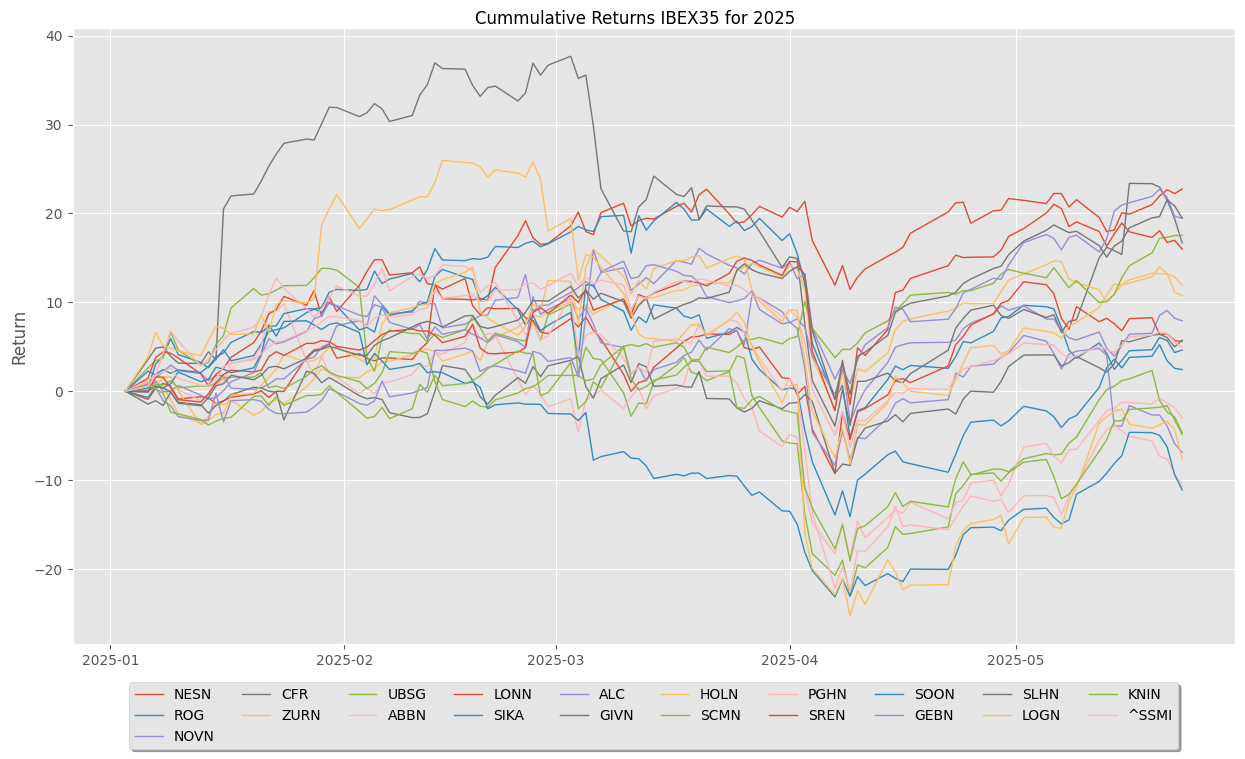

In [23]:
# Plot Cummulative Returns
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [24]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/21 [00:00<?, ?it/s]

In [25]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/21 [00:00<?, ?it/s]

,Ticker,Name,Date,Cummulative_Return
0,NESN.SW,Nestlé SA,2025-05-23,22.756257
1,GEBN.SW,Geberit AG,2025-05-23,19.480365
2,SLHN.SW,Swiss Life Holding AG,2025-05-23,19.474027
3,SCMN.SW,Swisscom AG,2025-05-23,17.527795
4,CFR.SW,Compagnie Financière Richemont SA,2025-05-23,16.685284
5,SREN.SW,Swiss Reinsurance Company Ltd,2025-05-23,15.993023
6,ZURN.SW,Zurich Insurance Group AG,2025-05-23,11.881313
7,HOLN.SW,Holcim Limited,2025-05-23,10.774843
8,NOVN.SW,Novartis International AG,2025-05-23,7.927347
9,GIVN.SW,Givaudan SA,2025-05-23,5.744655


In [26]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).head(30)

,Ticker,Name,Date,Cummulative_Return
0,NESN.SW,Nestlé SA,2025-05-23,22.756257
1,GEBN.SW,Geberit AG,2025-05-23,19.480365
2,SLHN.SW,Swiss Life Holding AG,2025-05-23,19.474027
3,SCMN.SW,Swisscom AG,2025-05-23,17.527795
4,CFR.SW,Compagnie Financière Richemont SA,2025-05-23,16.685284
5,SREN.SW,Swiss Reinsurance Company Ltd,2025-05-23,15.993023
6,ZURN.SW,Zurich Insurance Group AG,2025-05-23,11.881313
7,HOLN.SW,Holcim Limited,2025-05-23,10.774843
8,NOVN.SW,Novartis International AG,2025-05-23,7.927347
9,GIVN.SW,Givaudan SA,2025-05-23,5.744655


In [27]:
# Create also table of daily returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Daily_Return'] = daily_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Daily_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Daily_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Daily_Return'],ignore_index=True, ascending=False)

  0%|          | 0/21 [00:00<?, ?it/s]

,Ticker,Name,Date,Daily_Return
0,GIVN.SW,Givaudan SA,2025-05-23,0.712881
1,NESN.SW,Nestlé SA,2025-05-23,0.419734
2,ROG.SW,Roche Holding AG,2025-05-23,0.270055
3,SCMN.SW,Swisscom AG,2025-05-23,0.000000
4,LONN.SW,Lonza Group AG,2025-05-23,-0.107024
5,SIKA.SW,Sika AG,2025-05-23,-0.137357
6,GEBN.SW,Geberit AG,2025-05-23,-0.167336
7,NOVN.SW,Novartis International AG,2025-05-23,-0.258062
8,HOLN.SW,Holcim Limited,2025-05-23,-0.339270
9,^SSMI,SMI,2025-05-23,-0.580767
